In [ ]:
import json
import numpy as np
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import random

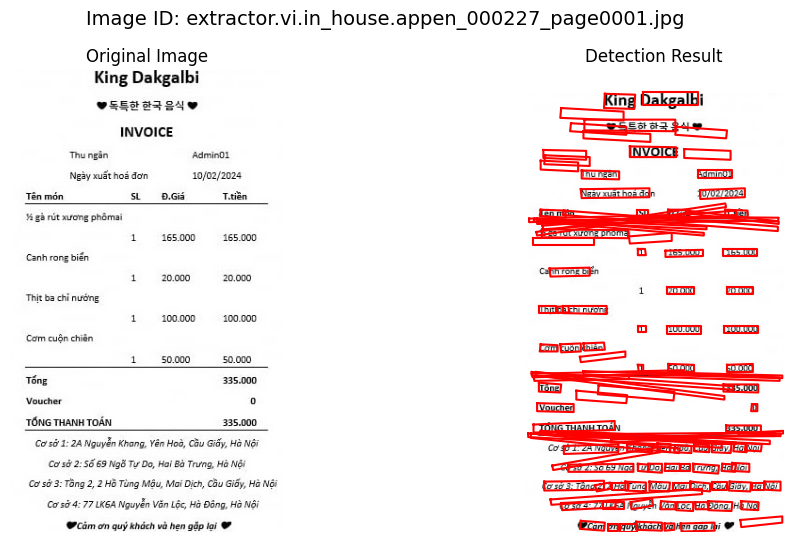

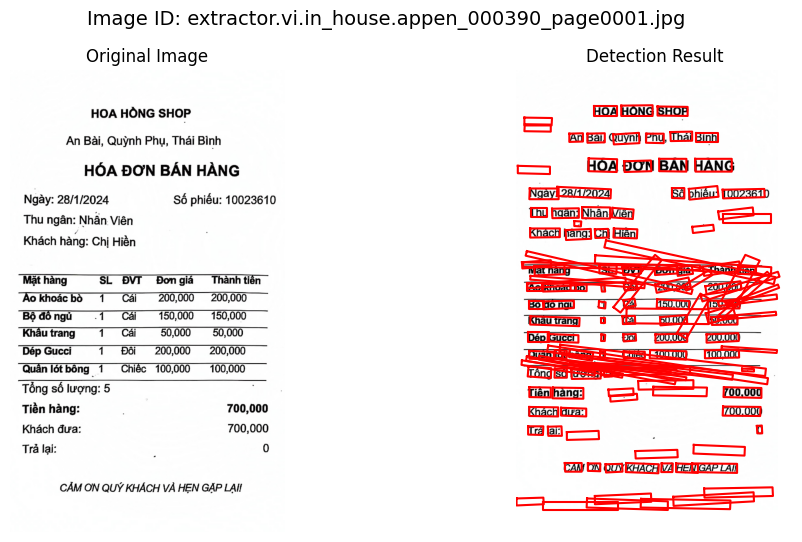

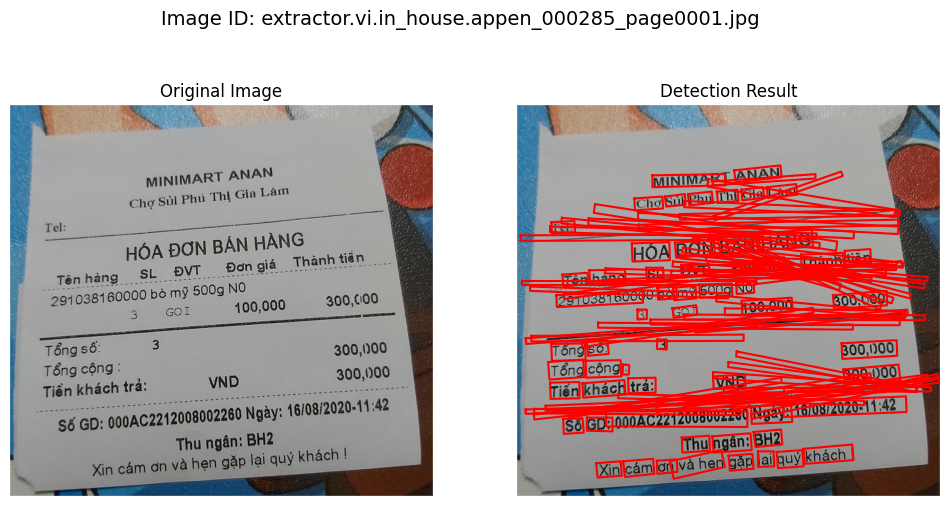

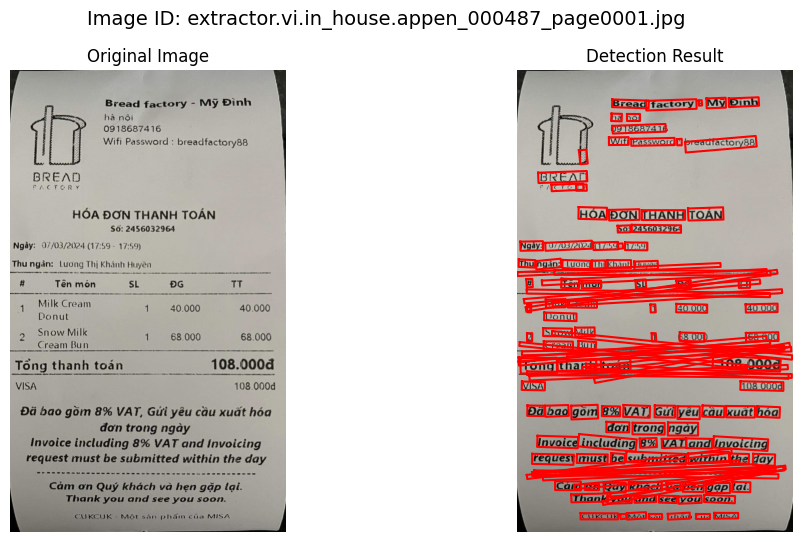

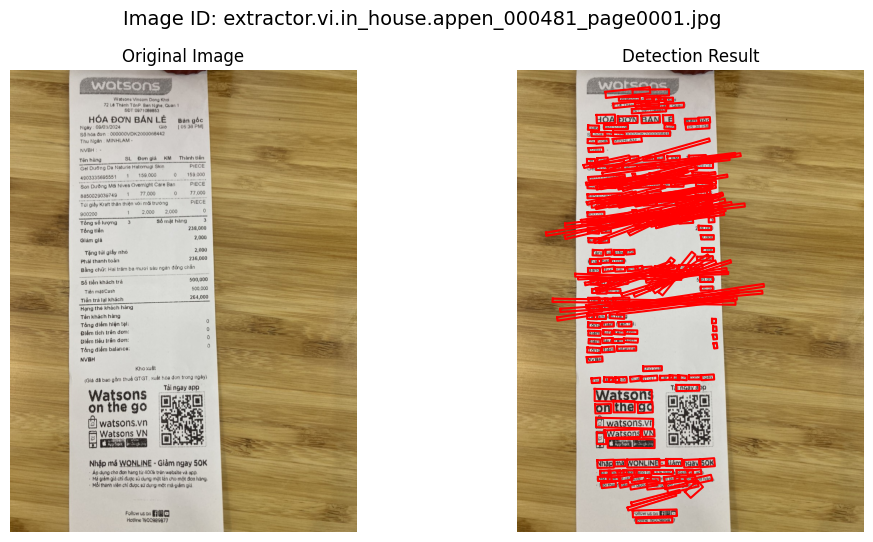

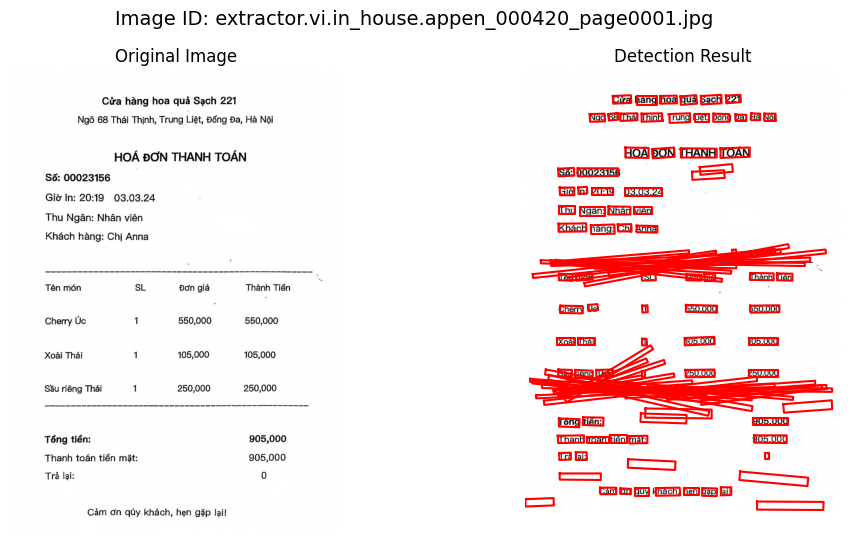

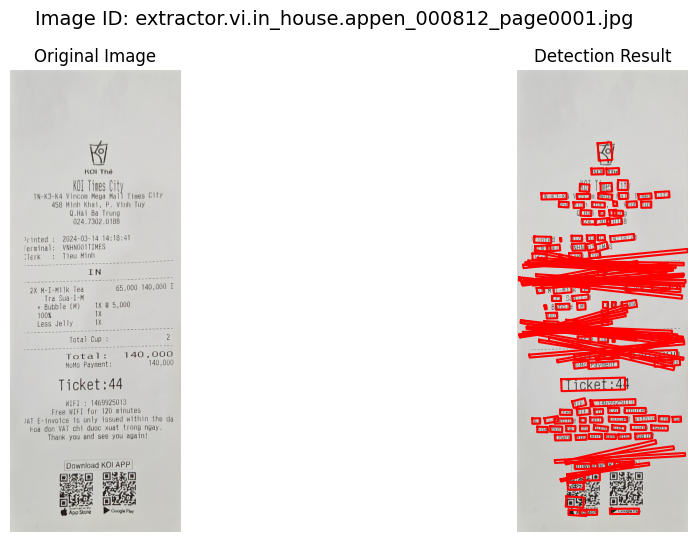

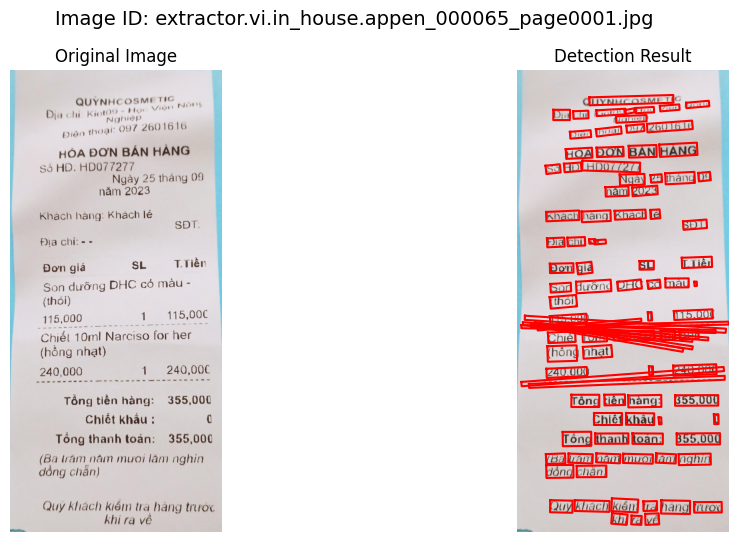

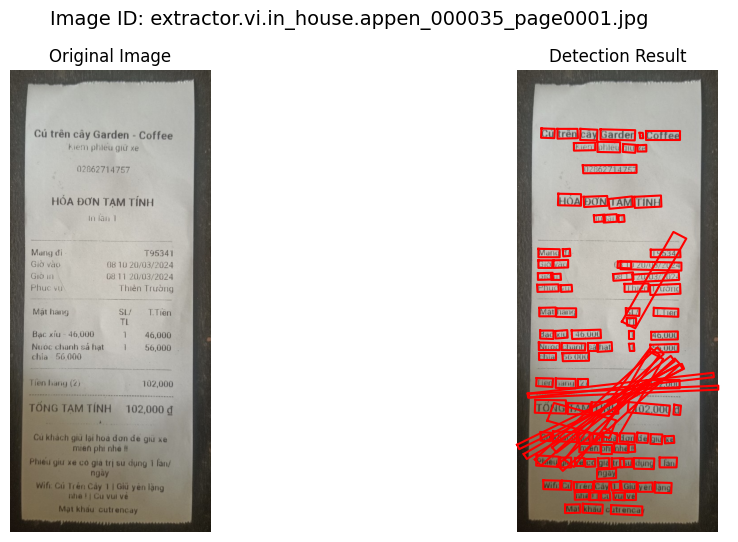

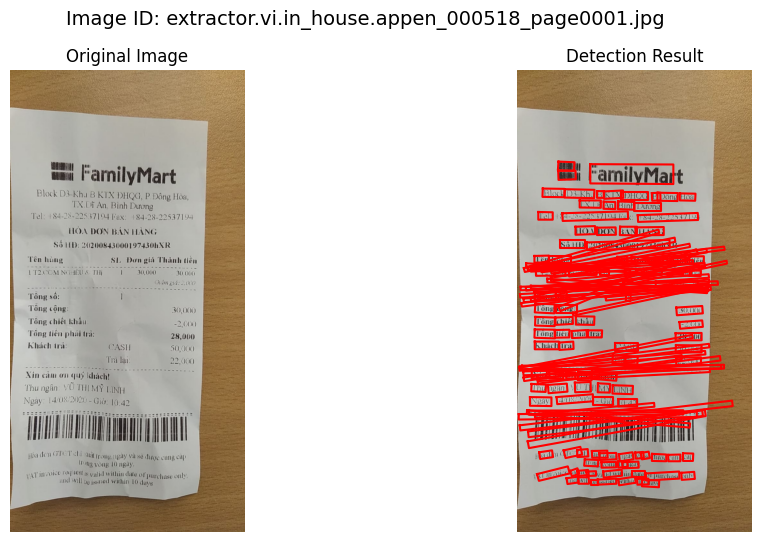

In [29]:
def read_json(filename):
    with Path(filename).open(encoding='utf8') as handle:
        ann = json.load(handle)
    return ann

# 언어 선택
# chinese, thai, vietnamese, japanese
language = "vietnamese"

# 예측 결과 json
data = read_json(f"./split/{language}_output.json")

# 'images'에서 무작위로 10개의 항목 선택
gt_dict = {}
sampled_items = random.sample(list(data['images'].items()), 10)
for image_id, value in sampled_items:
    gt_dict[image_id] = [word['points'] for word in value['words'].values()]
    
for img in gt_dict.keys():
    # 자신의 경로에 맞게 파일 경로를 수정
    image = cv2.imread(f"../data/{language}_receipt/img/test/{img}")
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR 형식이므로 RGB로 변환

    results = gt_dict[img]

    # 원본과 검출 결과 이미지를 나란히 표시
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f"Image ID: {img}", fontsize=14, color='black')

    # 왼쪽: 원본 이미지
    axes[0].imshow(image_rgb)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    # 오른쪽: 검출 결과 이미지
    axes[1].imshow(image_rgb)
    axes[1].set_title("Detection Result")
    for res in results:
        xy = np.int64(res).reshape(-1, 2)
        xy1, xy2, xy3, xy4 = xy[0], xy[1], xy[2], xy[3]
        axes[1].plot([xy1[0], xy2[0], xy3[0], xy4[0], xy1[0]], 
                     [xy1[1], xy2[1], xy3[1], xy4[1], xy1[1]], 'r-')
    axes[1].axis("off")

    plt.show()